In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import twitter
import json
from nltk import word_tokenize
import nltk
import string
import re
import io
import itertools
import ast
import pandas as pd 
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Lambda, Bidirectional, Dense, Dropout,LSTM
from tensorflow.keras.models import Model
import tensorflow.keras.layers
import tensorflow.keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Clean Data

In [2]:
def tweet_function2(fname): 

        
    data =[]
 
    text=[]
    
    
    file = open(fname, "r")
    for line in file:
        data.append(json.loads(line))
   

 
    for i in data:
        
    
        data = i['text']
        
        
        data = re.sub('https?:\/{2}[\d\w]+\.([\d\w]+)*(\/[^\s]*)*', ' ', data)  #to get rid of links
            # to get rid of all emoticons
        data=re.sub(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])|([\U0001F600-\U0001F64F])|([\U0001F300-\U0001F5FF])|([\U0001F680-\U0001F6FF])|([\U0001F1E0-\U0001F1FF])|([\U00002702-\U000027B0])|([\U000024C2-\U0001F251])','', data)
            #data[i]["text"] = emoji.get_emoji_regexp().sub(u'', data[i]["text"])
            # to get rid of all the # and  @ words as it can be found in the json file tags
        data=re.sub(r'(\s)@\w+|(\s)#\w+', r'\1',data)
            #to get rid of RT from the tweet text
        data=re.sub(r'RT : ',' ',data)
        data=re.sub('[\.]+', ' ',data)
            # to get rid of all new line char
        data = re.sub('\n+|\t+', ' ', data)
        data= re.sub(r"\b[a-zA-Z]\b", " ", data)
        data = re.sub(r'\W',' ',data)
        data = re.sub(r'\s+',' ',data)
        data=' '.join(word.strip(string.punctuation) for word in data.split(' '))
        if data != " ":
            text.append(data)
        #data=nltk.word_tokenize(data)
        #print(data)
       
        
    return text



clean_data2=tweet_function2('tweets2_la.json')
clean_data3=tweet_function2('tweets3_sea.json')
clean_data5=tweet_function2('tweets5_nyc_nohatenofear.json')
clean_data9=tweet_function2('tweets9_australiafires.json')
clean_data11=tweet_function2('tweets11_fightinlon.json')
clean_data12=tweet_function2('tweets12_womensmarchsanfran.json')
clean_data13=tweet_function2('tweets13_march4lifeAustin.json')
clean_data14=tweet_function2('tweets14_march4lifeDC.json')
clean_data15=tweet_function2('tweets15_antifaNYC.json')
clean_data17=tweet_function2('tweets17_transrightsSea.json')
clean_data18=tweet_function2('tweets18_antifaPdx.json')
clean_dataChar=tweet_function2('Char.json')

Data Frame

In [3]:
#combine the lists
part_0 = clean_data2 + clean_data3
#create df from the list
df_part_0=pd.DataFrame(part_0,columns=["Tweet"])
#add the violence column
df_part_0['Participation_Level']=0
df_part_0

,Tweet,Participation_Level
0,Los Angeles Dodgers LED Flashlight,0
1,Los Angeles Dodgers LED Flashlight,0
2,If you re in the Los Angeles CA area stop by a...,0
3,LA today,0
4,Jane Lynch calls out Elizabeth Warren on behal...,0
...,...,...
3021,Merry Christmas and Happy Holidays from all ou...,0
3022,JaValle donate direct to those in need This i...,0
3023,Agency Employees Volunteer Support for Kids in...,0
3024,Lime to pull bikes from Seattle bring them bac...,0


In [4]:
part_1_1k = clean_data11+clean_data15+clean_data17+clean_data18+clean_dataChar

#create df from the list
df_part_1_1k=pd.DataFrame(part_1_1k,columns=["Tweet"])
#add the violence column
df_part_1_1k['Participation_Level']=1
df_part_1_1k

,Tweet,Participation_Level
0,With the elites meeting at it the perfect time...,1
1,Inequality is political choice It doesn have t...,1
2,Taxes on unequal pay are sensible and possible...,1
3,The 2020 London Women March emphasized the im...,1
4,Great speeches and energy at the protest today,1
...,...,...
10062,Thoughtful intelligent dialogue on tonight mis...,1
10063,In Charlottesville the Local Jewish Community ...,1
10064,After Charlottesville Trump business buddies h...,1
10065,PLEASE RETWEET THIS if you were angered and or...,1


In [5]:
part_1k_10k = clean_data13
#create df from the list
df_part_1k_10k=pd.DataFrame(part_1k_10k,columns=["Tweet"])
#add the violence column
df_part_1k_10k['Participation_Level']=2
df_part_1k_10k

,Tweet,Participation_Level
0,got to speak with Rep Chip Roy yesterday at t...,2
1,got to speak with Rep Chip Roy yesterday at t...,2
2,got to speak with Rep Chip Roy yesterday at t...,2
3,March For Life Thousands of Pro Life Texans M...,2
4,March For Life Thousands of Pro Life Texans M...,2
...,...,...
965,Life does not end at birth don be hypocrite su...,2
966,Proud that our awesome President will attend ...,2
967,Proud that our awesome President will attend a...,2
968,Excellent,2


In [6]:
part_10k_50k=clean_data5+clean_data12+clean_data9
#create df from the list
df_part_10k_50k=pd.DataFrame(part_10k_50k,columns=["Tweet"])
#add the violence column
df_part_10k_50k['Participation_Level']=3
df_part_10k_50k

,Tweet,Participation_Level
0,Why should Catholics stand with our Jewish br...,3
1,Today marched with 20 000 to combat The outpo...,3
2,Coming together amp showing up for one anothe...,3
3,Why should Catholics stand with our Jewish br...,3
4,At the Against anti Semitism March in with an...,3
...,...,...
13190,And if we ever wondered if our government was...,3
13191,ℹ KNOW THE FACTS ℹ The has said that lightnin...,3
13192,Thread gt An update from my Dad village of Ra...,3
13193,With so many houses lost amp property destroy...,3


In [7]:
part_50k_more=clean_data14
#create df from the list
df_part_50k_more=pd.DataFrame(part_50k_more,columns=["Tweet"])
#add the violence column
df_part_50k_more['Participation_Level']=4
df_part_50k_more

,Tweet,Participation_Level
0,One of the many reasons,4
1,As the Bible tells us each person is wonderfu...,4
2,Why Because every human being is person that ...,4
3,Honored to join hundreds of thousands in the ...,4
4,Charlotte Pence Bond author and the daughter ...,4
...,...,...
1075,We re fighting for the God given right of lif...,4
1076,realDonaldTrump aux militants de la Je me bat...,4
1077,By going to the trump is banking on evangelic...,4
1078,Charlotte Pence Bond author and the daughter ...,4


In [8]:
combine_dataset=pd.concat([df_part_0,df_part_1_1k,df_part_1k_10k,df_part_10k_50k,df_part_50k_more])

In [9]:
combine_dataset = combine_dataset.sample(frac = 1)

In [10]:
combine_dataset

,Tweet,Participation_Level
10684,Speeches over packed crowds funnel out to beg...,3
880,Fixed,4
7972,Incredible photo taken at the Sydney rally,3
1543,Why should Catholics stand with our Jewish br...,3
874,Los Angeles Dodgers LED Flashlight,0
...,...,...
4946,AntifaTerrorists This hashtag created by corp...,1
10234,It heartening to see in some areas the bush i...,3
1662,Awesome crowd global protest against inequali...,1
9399,How First Australians ancient knowledge can he...,3


In [11]:
train_validate, test = combine_dataset[0:26000], combine_dataset[26000:] #divide data for train+validation and test

In [12]:
train_validate

,Tweet,Participation_Level
10684,Speeches over packed crowds funnel out to beg...,3
880,Fixed,4
7972,Incredible photo taken at the Sydney rally,3
1543,Why should Catholics stand with our Jewish br...,3
874,Los Angeles Dodgers LED Flashlight,0
...,...,...
300,Great speeches and energy at the protest today,1
8541,LeBron calls for healing takes swipe at Trump,1
1843,Some of the incredible signs from yesterday No...,3
10495,scomo said on that we need to Adapt Well it b...,3


In [13]:
X = train_validate[train_validate.columns[0]]
y_int = train_validate.drop(combine_dataset.columns[0], axis = 1)

In [14]:
from keras.utils import to_categorical
y = to_categorical(train_validate['Participation_Level']) #To Categorical Data

Using TensorFlow backend.


ELMo

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils

In [3]:
embed = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)
def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

In [4]:
def build_model(): 
    input_text = Input(shape=(1,), dtype=tf.string)
    embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
    dense = Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(embedding)
    pred = Dense(5, activation='softmax')(dense)
    model = Model(inputs=[input_text], outputs=pred)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model_elmo = build_model()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model_elmo.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
lambda (Lambda)              (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 263,685
Trainable params: 263,685
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Train and validate
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    history = model_elmo.fit(X, y, epochs=1, batch_size=256, validation_split = 0.2)
    model_elmo.save_weights('./model_elmo_weightsB.h5')

Train on 20800 samples, validate on 5200 samples
20800/20800 [==============================] - 2090s 100ms/sample - loss: 0.8018 - acc: 0.8497 - val_loss: 0.4680 - val_acc: 0.9635


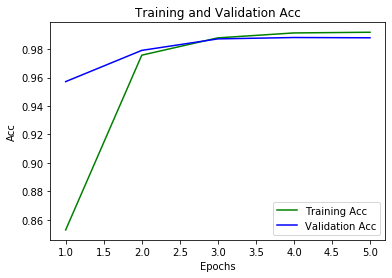

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

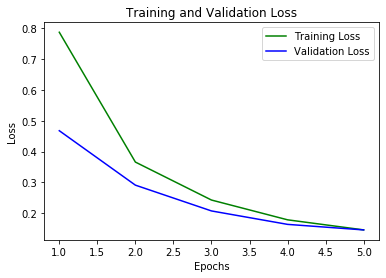

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
#Test
X_test2 = test[test.columns[0]]
y_int = test.drop(test.columns[0], axis = 1)

In [20]:
from keras.utils import to_categorical
y_test = to_categorical(test['Participation_Level'])

In [27]:
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    model_elmo = build_model() 
    model_elmo.load_weights('./model_elmo_weightsB.h5')
    predicts = model_elmo.predict(X_test2)
    print(predicts)
    results = model_elmo.evaluate(X_test2, y_test, batch_size=256)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[9.83669460e-01 1.06913911e-03 2.75155134e-03 1.18249105e-02
  6.85098465e-04]
 [3.69751872e-03 2.13477202e-03 2.40165522e-04 9.93428528e-01
  4.99059854e-04]
 [6.78255223e-04 4.86326730e-03 3.88394808e-03 9.90350127e-01
  2.24474512e-04]
 ...
 [5.92513196e-03 9.52447951e-01 1.05153688e-03 3.98751684e-02
  7.00325647e-04]
 [1.07116043e-03 1.28857018e-02 4.90336271e-04 9.85073507e-01
  4.79344599e-04]
 [5.44894449e-02 1.92781419e-01 1.79533078e-03 1.89304743e-02
  7.32003391e-01]]
2338/2338 [==============================] - 273s 117ms/sample - loss: 0.4686 - acc: 0.9632
